
<font size="6" color="Green" align="center"><b>LEVEL 1</b></font><br>

<font size="5" color="Darkblue" align="center"><b>Project1:
Retail Sales Exploratory Data Analysis (EDA) </b></font><br>

<font size="4" color="purple" align="center"><b>Introduction</b></font><br>

Welcome to the Retail Sales Exploratory Data Analysis (EDA) project. In this notebook, we will delve into the Retail Sales Dataset provided by Kaggle. Our goal is to perform a comprehensive exploratory data analysis to uncover patterns, trends, and insights that can help the retail business make informed decisions.<br>

<font size="4" color="purple" align="center"><b>Exploratory Data Analysis (EDA)</b></font><br>

EDA is a crucial step in the data science process, where we analyze the main characteristics of the dataset using both statistical and graphical methods. By conducting EDA, we aim to:

Understand the structure and distribution of the data.
Identify outliers and anomalies.
Detect patterns, relationships, and trends.
Formulate hypotheses for further analysis.
Through EDA, we can gain a better understanding of the data, which will help in building more accurate models and making more informed business decisions.

<font size="4" color="purple" align="center"><b>About the dataset</b></font><br>
This synthetic retail dataset includes attributes such as Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, and Total Amount. It is designed to simulate a real-world retail environment, allowing for the exploration of sales trends, demographic influences, and purchasing behaviors. Ideal for practicing exploratory data analysis (EDA), it provides a realistic platform for generating insights and hypotheses about customer behavior and retail strategies. Dataset: (<a href="https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset">link</a>)<br>
This dataset will be highly useful for improving retail sales strategies by allowing us to analyze:

* Seasonal trends and patterns in sales.
* Customer purchasing behavior.
* Product performance.
* Store performance and regional sales trends.

<b> Key Concepts and Challenges </b>
1. Data Loading and Cleaning: Load the retail sales dataset.
2. Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation).
3. Time Series Analysis: Analyze sales trends over time using time series techniques.
4. Customer and Product Analysis: Analyze customer demographics and purchasing behavior.
5. Visualization: Present insights through bar charts, line plots, and heatmaps.
6. Recommendations: Provide actionable recommendations based on the EDA




<b>IMPORTING REQUIRED LIBRARY</B>

In [1]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating plots and charts
import seaborn as sns  # For statistical data visualization

<font size="4" color="darkblue" align="center"><b>1. Data Loading and Cleaning</b></font><b></b>

In [2]:
# Read CSV file into a DataFrame
df = pd.read_csv("retail_sales_dataset.csv")

<font size="4" color="purple" align="center"><b>Data Audits</b></font>

In [3]:
df.head() # Show first 5 records of data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.tail() # Last five rows of the dataset


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [5]:
# Show the dimensions of the DataFrame
df.shape

(1000, 9)

In [6]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [8]:
df.dtypes

,0
Transaction ID,int64
Date,object
Customer ID,object
Gender,object
Age,int64
Product Category,object
Quantity,int64
Price per Unit,int64
Total Amount,int64


<font size="4" color="purple" align="center"><b>Check for Missing Values</b></font><b></b>

In [9]:
# Check for Missing Values using isnull()
df.isnull().sum()

#df.dropna(inplace=True) Drop or Fill Missing Values
#df.drop_duplicates(inplace=True)

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [10]:
# Using Userdefind Functions
[features for features in df.columns if df[features].isnull().sum()>0]

[]

<Axes: >

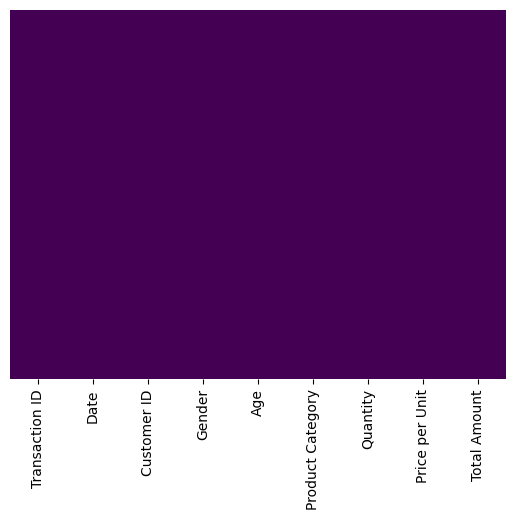

In [11]:
# Using heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# missing value less not showing in this heatmap

In [12]:
# set the Data Types
df['Date'] = pd.to_datetime(df['Date'])

<font size="4" color="darkblue" align="center"><b>2. Descriptive Statistics</b></font>

In [13]:
df.describe(include='all')

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,NaN,1000,2,NaN,3,NaN,NaN,NaN
top,NaN,NaN,CUST001,Female,NaN,Clothing,NaN,NaN,NaN
freq,NaN,NaN,1,510,NaN,351,NaN,NaN,NaN
mean,500.500000,2023-07-03 00:25:55.200000256,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,NaN,NaN,64.00000,NaN,4.000000,500.000000,2000.000000


<b>EXPLORATORY DATA ANALYSIS</B>

<font size="4" color="darkblue" align="center"><b>3. Time Series Analysis</b></font>

In [14]:
print(df.columns)

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [15]:
# Find the minimum date
min_date = df['Date'].min()
print('Min_date', min_date)


Min_date 2023-01-01 00:00:00


In [16]:
max_date = df['Date'].max()
print('Max_date', max_date)

Max_date 2024-01-01 00:00:00


In [17]:
# Set the Date as Index
df.set_index('Date', inplace=True)

In [21]:
# Resample to monthly data
monthly_sales = df.resample('M').sum()['Total Amount']

# Print the first five rows of monthly sales
print("First five rows of Monthly Sales: ")
print(monthly_sales.head())

# Print the last five rows of monthly sales
print("\nLast five rows of Monthly Sales: ")
print(monthly_sales.tail())

# Print the minimum date in monthly sales data
print("\nMonthly Sales minimum date: ")
print(monthly_sales.index.min())

# Print the maximum date in monthly sales data
print("\nMonthly Sales maximum date: ")
print(monthly_sales.index.max())


First five rows of Monthly Sales: 
Date
2023-01-31    35450
2023-02-28    44060
2023-03-31    28990
2023-04-30    33870
2023-05-31    53150
Freq: M, Name: Total Amount, dtype: int64

Last five rows of Monthly Sales: 
Date
2023-09-30    23620
2023-10-31    46580
2023-11-30    34920
2023-12-31    44690
2024-01-31     1530
Freq: M, Name: Total Amount, dtype: int64

Monthly Sales minimum date: 
2023-01-31 00:00:00

Monthly Sales maximum date: 
2024-01-31 00:00:00


Data range: 2023-01-31 00:00:00 to 2024-01-31 00:00:00


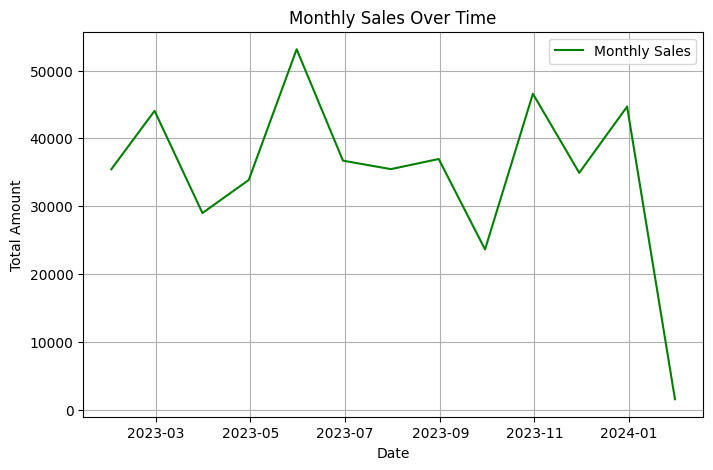

In [23]:
# Resample to monthly data
monthly_sales = df.resample('M').sum()['Total Amount']

# Verify data range
print(f"Data range: {monthly_sales.index.min()} to {monthly_sales.index.max()}")

# Plot the monthly sales
plt.figure(figsize=(8, 5))
plt.plot(monthly_sales.index, monthly_sales, label='Monthly Sales', color='g')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.legend()  # Place legend after plot elements
plt.show()

<b>Insights:</b>

1.Sales Trends:

* Seasonal Patterns: Sales peak in months like May and October, while dropping in September and January. This suggests seasonal variations influenced by factors like holidays or promotions.
* Recent Drop: A significant sales drop in January 2024 to 1,530 may indicate issues such as a seasonal slowdown or stockouts.

2.Monthly Variations:

* Highs and Lows: Sales peaked in May (53,150) and were lowest in January 2024 (1,530), indicating fluctuating demand or marketing effectiveness.
* Consistency: Most of the year shows moderate to high sales, but further investigation is needed to identify consistent patterns.

<font size="4" color="darkblue" align="center"><b>4. Customer and Product Analysis</b></font>

<font size="3" color="purple" align="center"><b>4.1 Analyze customer demographics</b></font><br>  

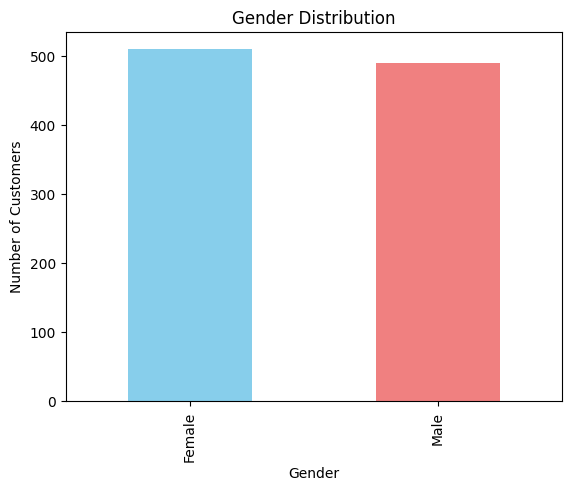

Customer Distribution by Gender:
 Gender
Female    510
Male      490
Name: count, dtype: int64


In [24]:
# Customer demographics
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

print("Customer Distribution by Gender:\n", gender_counts)

<b>Insights:</b> The customer base is almost evenly split between genders, with females(510) slightly outnumbering males(490).

<font size="3" color="purple" align="center"><b>4.2Gender Distribution by Age Group</b></font><br>

<ipython-input-25-e7db210eadd7>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_distribution = df.groupby(['Age Group', 'Gender']).size().unstack()


<Figure size 1200x800 with 0 Axes>

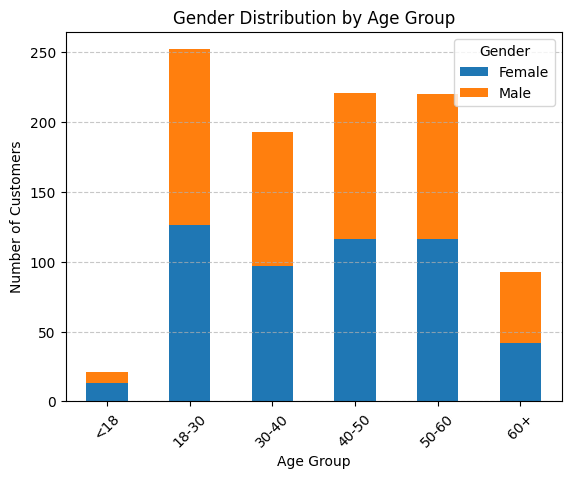

Gender Distribution by Age Group:
 Gender     Female  Male
Age Group              
<18            13     8
18-30         126   126
30-40          97    96
40-50         116   105
50-60         116   104
60+            42    51


In [25]:
# Define age groups
age_bins = [0, 18, 30, 40, 50, 60, 100]
age_labels = ['<18', '18-30', '30-40', '40-50', '50-60', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Gender distribution by age group
age_gender_distribution = df.groupby(['Age Group', 'Gender']).size().unstack()

plt.figure(figsize=(12, 8))
age_gender_distribution.plot(kind='bar', stacked=True)
plt.title('Gender Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print the age and gender distribution values
print("Gender Distribution by Age Group:\n", age_gender_distribution)


<b>Insights:</b>

* <18 years: Smallest segment with 13 females and 8 males.
* 18-30 years: Largest segment, evenly split with 126 females and 126 males.
* 30-40 years: Balanced with 97 females and 96 males.
* 40-50 years: Slightly more females (116) than males (105).
* 50-60 years: Almost balanced, with 116 females and 104 males.
* 60+ years: Slightly more males (51) than females (42).

<font size="3" color="purple" align="center"><b>4.3 Total spending per customer</b></font><br>

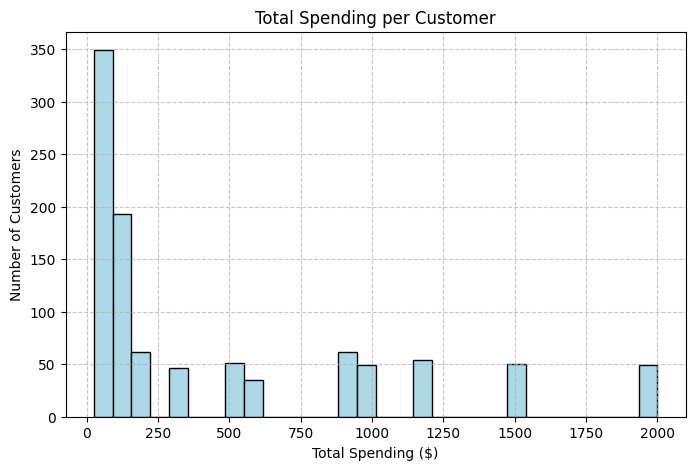

Total Spending per Customer:
 count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: Total Amount, dtype: float64


In [26]:
# Total spending per customer
total_spending_per_customer = df.groupby('Customer ID')['Total Amount'].sum()

# Plot distribution
plt.figure(figsize=(8, 5))
total_spending_per_customer.plot(kind='hist', bins=30, color='lightblue', edgecolor='black')
plt.title('Total Spending per Customer')
plt.xlabel('Total Spending ($)')
plt.ylabel('Number of Customers')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("Total Spending per Customer:\n", total_spending_per_customer.describe())

Insights:
* Average Spending: The mean total spending per customer is 456, indicating a moderate level of expenditure.
* Spending Distribution: The standard deviation of 559.99 suggests a wide range of spending habits among customers. This is further supported by the significant difference between the median (135) and the 75th percentile (900).
* Customer Segments: The data suggests the presence of two distinct customer segments:
* Low-to-Medium Spenders: Approximately 75% of customers spend between 25 and 900.
* High Spenders: The remaining 25% of customers spend between 900 and 2000.

<font size="3" color="purple" align="center"><b>4.4 Total Number of Sales by Product Category</b></font><br>

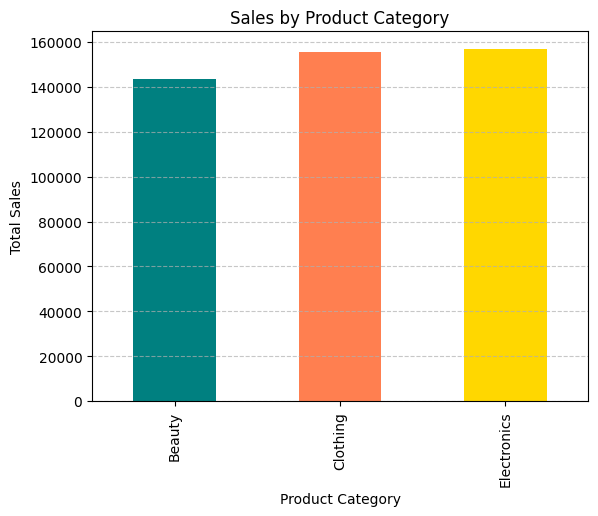

Total Number of Sales by Product Category:
 Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64


In [27]:
# Product performance
sales_by_category = df.groupby('Product Category')['Total Amount'].sum()

# Create a horizontal bar chart with multiple colors
colors = ['teal', 'coral', 'gold', 'royalblue']

sales_by_category.plot(kind='bar', color=colors)
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Sales by Product Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Total Number of Sales by Product Category:\n", sales_by_category )

<font size="3" color="purple" align="center"><b>4.5 Average Spending by Product Category</b></font><br>

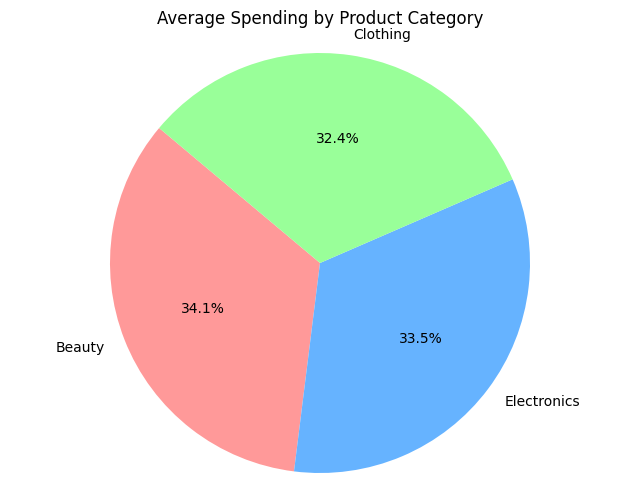

Average Spending by Product Category:
 Product Category
Beauty         467.475570
Electronics    458.786550
Clothing       443.247863
Name: Total Amount, dtype: float64


In [28]:
# Step 1: Calculate average spending by product category
pc_avg_spending = df.groupby('Product Category')['Total Amount'].mean().sort_values(ascending=False)

# Step 2: Define a simple color palette with three colors
simple_colors = ['#ff9999', '#66b3ff', '#99ff99']

# Step 3: Plot a pie chart with the percentages
plt.figure(figsize=(8, 6))
pc_avg_spending.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=simple_colors)

plt.title('Average Spending by Product Category')
plt.ylabel('')  # Hide the y-label for a cleaner look
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


print("Average Spending by Product Category:\n", pc_avg_spending)

<b>Observations:</b>

1.Total Number of Sales:
* Beauty: 143,515 sales
* Clothing: 155,580 sales
* Electronics: 156,905 sales

2.Average Spending:
* Beauty: $467.48

* Electronics: $458.79

* Clothing: $443.25

<b>Key points</b><br>
* Beauty: Lower number of sales but highest average spending. Indicates a premium segment with customers willing to spend more per transaction. <br>
* Electronics and Clothing: Higher number of sales but slightly lower average spending. Indicates high transaction volume but moderate spending per transaction.

<b>Insights</b><br>
* Beauty: Focus on high-value customers who spend more.
* Electronics and Clothing: Leverage high transaction volumes with promotions and diverse product offerings to boost sales.

<font size="3" color="purple" align="center"><b>4.6 Comparison of Total Quantity and Average Spending by Product Category</b></font><br>

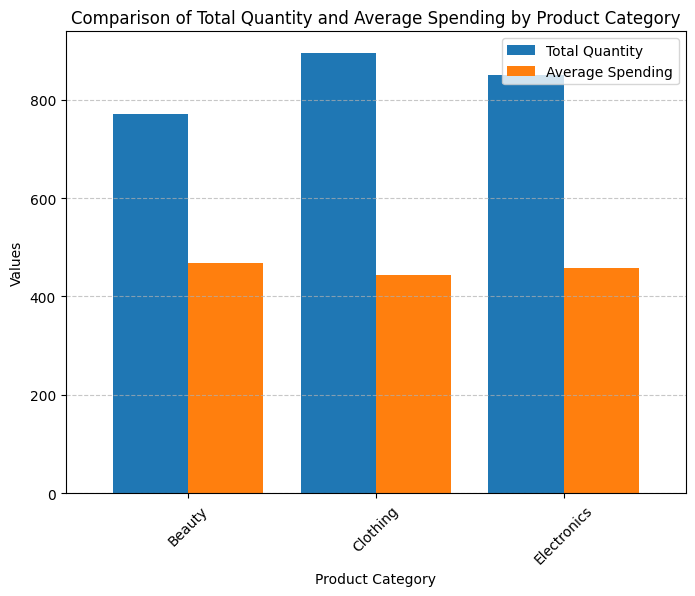

Comparison of Total Quantity and Average Spending by Product Category:
                   Total Quantity  Average Spending
Product Category                                  
Beauty                       771        467.475570
Clothing                     894        443.247863
Electronics                  849        458.786550


In [29]:
# Calculate total quantity by product category
product_category_quantity = df.groupby('Product Category')['Quantity'].sum()

# Calculate average spending by product category
average_spending = df.groupby('Product Category')['Total Amount'].mean()

# Create a DataFrame for easy plotting
comparison_df = pd.DataFrame({
    'Total Quantity': product_category_quantity,
    'Average Spending': average_spending
})

# Plotting
comparison_df.plot(kind='bar', figsize=(8, 6), width=0.8)
plt.title('Comparison of Total Quantity and Average Spending by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

# Print the comparison DataFrame
print("Comparison of Total Quantity and Average Spending by Product Category:\n", comparison_df)

<font size="4" color="darkblue" align="center"><b>5. Find the Numerical and Categorical Features</b></font><br>

In [30]:
# Find categorical features
categorical_features = {i for i in df.columns if df[i].dtype == 'object'}
print("Categorical Features:", categorical_features)

numerical_features = {i for i in df.columns if df[i].dtype != 'object'}
print("Numerical Features:",numerical_features)


Categorical Features: {'Gender', 'Product Category', 'Customer ID'}
Numerical Features: {'Age Group', 'Transaction ID', 'Quantity', 'Age', 'Price per Unit', 'Total Amount'}


In [31]:
len(numerical_features)

6

<font size="3" color="purple" align="center"><b>5. 1 Correlation between Numerical Features</b></font><br>

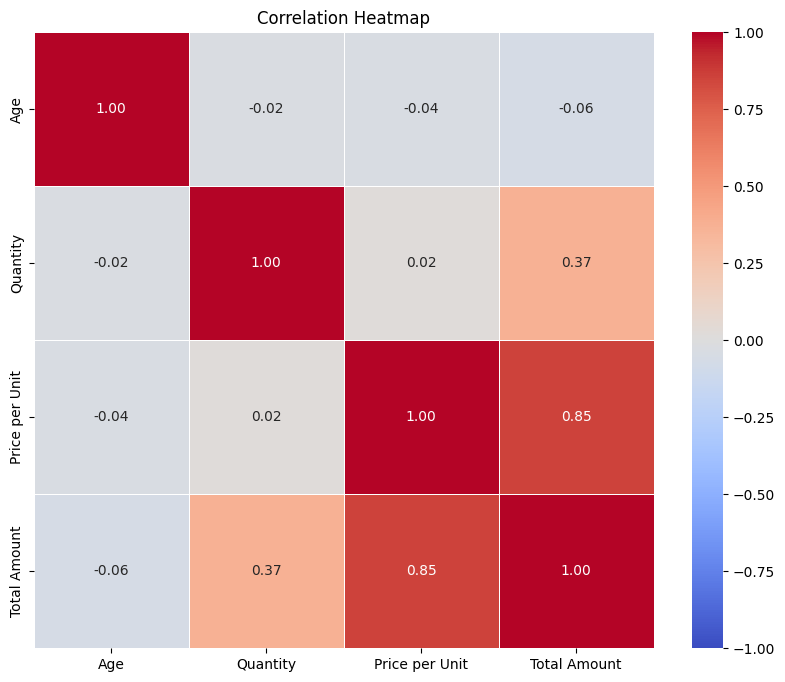

                     Age  Quantity  Price per Unit  Total Amount
Age             1.000000 -0.023737       -0.038423     -0.060568
Quantity       -0.023737  1.000000        0.017501      0.373707
Price per Unit -0.038423  0.017501        1.000000      0.851925
Total Amount   -0.060568  0.373707        0.851925      1.000000


In [32]:
correlation_matrix = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()
print(correlation_matrix)


<b>Insights:</b>
* Weak correlation with quantity (-0.024), price per unit (-0.038), and total amount (-0.061). Age has minimal impact on these variables.
* Strong positive correlation with total amount (0.852). Higher prices per unit significantly increase total spending.

<font size="4" color="darkblue" align="center"><b>Conclusion:</b></font><br>
The Exploratory Data Analysis (EDA) has provided valuable insights into the retail business's performance and customer behavior. The analysis uncovered key patterns, trends, and anomalies, which are essential for making informed business decisions.

<b>Sales Trends: </b>
The data revealed significant seasonal variations in sales, with peaks in specific months such as May and October, and notable drops in others like January. This indicates the presence of seasonal influences and potential issues in January 2024.

<b>Product Performance: </b>
Different product categories showed varying levels of sales and customer engagement. High-spending customers are more prevalent in the beauty segment, while electronics and clothing benefit from diverse product offerings and promotions.

<b>Customer Segmentation: </b>
Customer behavior varies significantly by age and spending patterns. Younger customers respond well to targeted marketing and social media engagement, while older customers prefer health-related products and senior-friendly services.

<b>Sales Fluctuations: </b>
The analysis identified fluctuations in sales, with highs and lows suggesting opportunities for better inventory management and promotional strategies.
<br>
<font size="4" color="darkblue" align="center"><b>Recommendations</b></font><br>
<b>Investigate Sales Drops:</b>

Conduct a detailed analysis to understand the causes behind the significant drop in January 2024. Explore market conditions, operational issues, and customer behavior changes to address these challenges and prevent future occurrences.

<b>Leverage Peak Periods:</b>

Develop and implement targeted marketing campaigns during high-sales months such as May and October. Capitalize on increased customer engagement during these periods to maximize revenue.

<b>Stabilize Sales Performance:</b>

Create strategies to manage sales fluctuations throughout the year. Consider inventory adjustments, promotional activities during slower periods, and improved demand forecasting to ensure more consistent sales.

<b>Enhance Seasonal Promotions:</b>

Plan and execute promotions around high-sales periods to boost revenue. Develop strategies to stimulate sales during slower months, balancing out the annual revenue cycle.

<b>Monitor Trends Regularly:</b>

Continuously analyze sales data to stay informed about emerging trends and shifts in customer behavior. Regular updates will help in adapting strategies proactively.

<b>Utilize Customer Feedback:</b>
Collect and analyze customer feedback to tailor marketing efforts and product offerings. Align strategies with customer preferences to enhance satisfaction and drive sales.

<b>Product Category Focus:</b>

* Beauty: Concentrate on high-spending customers by offering luxury products and exclusive services.
* Electronics and Clothing: Increase sales through targeted promotions and effective inventory management.

<b>Age-Based Marketing Strategies:</b>

* Under 18 Years: Engage with targeted marketing and educational programs.
18-30 Years: Focus on retention with loyalty programs and a strong social media presence.
* 30-40 Years: Maintain balanced offerings and consider family-oriented services.
* 40-50 Years: Tailor marketing towards females and promote health-related products.
* 50-60 Years: Emphasize health and retirement services, along with community-building activities.
* 60+ Years: Provide accessible, senior-friendly products and services.

<b>Target High Spenders:</b>

Develop strategies to retain and grow the high-value customer segment by offering tailored experiences and personalized marketing.

<b>Customer Segmentation and Data Analysis:</b>

Refine strategies for different spending groups based on in-depth analysis of customer behavior. Use these insights to enhance overall satisfaction and optimize marketing efforts.<br>
<b> Correlation :</b>

Carefully adjust prices per unit to maximize total revenue, considering its strong impact and Highlight higher-priced items to increase total sales.

<b><i>By implementing these recommendations, the retail business can effectively address key challenges, optimize performance, and drive long-term growth through data-driven decision-making.</i></b>